In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

import wrangle
import split_scale
import explore

# Goal
- Walk through the data science process using telco churn data


# Acquire & Prep
- Our data comes from the telco churn database on our shared SQL server
- We are only including customers on a two year contract
- We are only including customer id, monthly charges, tenure, and total charges

In [2]:
# This function reads in our data and preps it by imputing nulls and casting variables to proper data types
df = wrangle.wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
# no nulls, columns have accurate data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


## Split Data

In [5]:
# Split data between train and test to avoid overfitting models. 70% train, 30% test. random state = 123

In [6]:
# create variables to distinguish between features and target variable
X = df[['monthly_charges','tenure']]
y =df[['total_charges']]
print(X.head())
print(y.head())

   monthly_charges  tenure
0           109.70      71
1            84.65      63
2            90.45      65
3            45.20      54
4           116.80      72
   total_charges
0        7904.25
1        5377.80
2        5957.90
3        2460.55
4        8456.75


In [7]:
# call function to split X variables into train and test
X_train, X_test = split_scale.split_my_data(X)

In [8]:
# call function to split y variable into train and test
y_train, y_test = split_scale.split_my_data(y)

In [9]:
# check shapes of new variables to ensure successful split
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (1186, 2)
X_test shape is (509, 2)
y_train shape is (1186, 1)
y_test shape is (509, 1)


## Scaling Data
- When data contains features highly varying in magnitude, we need to scale the data. Machine learning algorithms take in the magnitude of the data, but ignore the units. If we do not scale, the features with higher magnitudes will erroneously outweigh the other features. Here we provide an example of a scaler and how to scale.  

### Standard Scaler

In [10]:
scaler, X_train_scaled, X_test_scaled = split_scale.standard_scaler(X_train, X_test)

In [11]:
X_train_scaled.head()

,monthly_charges,tenure
1469,0.672591,0.838946
163,1.237494,0.441745
392,-1.159761,0.044543
1546,0.575095,0.838946
797,0.014492,0.214772


In [12]:
X_test_scaled.head()

,monthly_charges,tenure
252,-1.169798,-2.679126
632,0.418814,0.328258
472,-1.187003,0.725460
1029,1.111323,0.328258
910,0.603770,0.782203


In [13]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

## Scaling X and y at the same time

In [14]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_scaler, y_scaler = split_scale.standard_scaler_y(X_train, X_test, y_train, y_test)

In [15]:
print('X_train scaled is', X_train_scaled.head())
print('X_test scaled is', X_test_scaled.head())
print('y_train scaled is', y_train_scaled.head())
print('y_test scaled is', y_test_scaled.head())

X_train scaled is       monthly_charges    tenure
1469         0.672591  0.838946
163          1.237494  0.441745
392         -1.159761  0.044543
1546         0.575095  0.838946
797          0.014492  0.214772
X_test scaled is       monthly_charges    tenure
252         -1.169798 -2.679126
632          0.418814  0.328258
472         -1.187003  0.725460
1029         1.111323  0.328258
910          0.603770  0.782203
y_train scaled is       total_charges
1469       0.910993
163        1.144459
392       -0.986222
1546       0.776991
797        0.003859
y_test scaled is       total_charges
252       -1.361639
632        0.373899
472       -0.881538
1029       1.001483
910        0.873630


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


# Explore

In [17]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

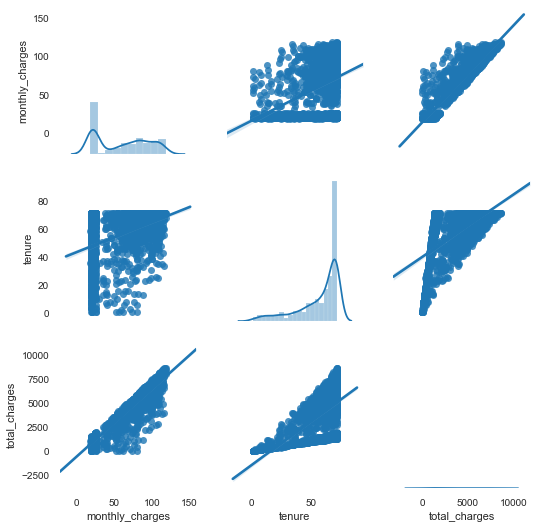

In [18]:
explore.plot_variable_pairs(df)

In [19]:
explore.months_to_years(df)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5
1691,9972-EWRJS,19.25,67,1372.90,5
1692,9975-GPKZU,19.75,46,856.50,3
1693,9993-LHIEB,67.85,67,4627.65,5


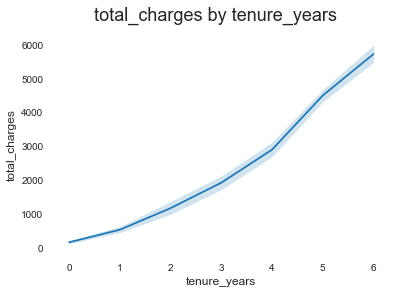

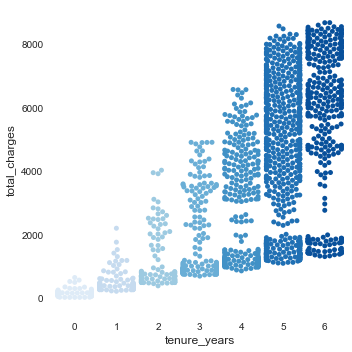

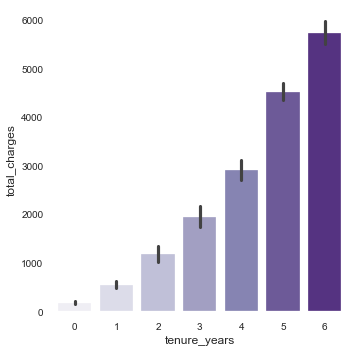

In [21]:
explore.plot_categorical_and_continuous_vars('tenure_years', 'total_charges', df)

In [28]:
df.profile_report()